In [148]:
import pandas as pd
import matplotlib.pyplot as plt

In [149]:
# reading the output.txt

n_lines = 20
with open('output2.txt', 'r') as f:
    cnt = 0
    output = ""
    while cnt < n_lines:
        output += f.readline()
        cnt+=1
        
print(output)

0; 27.00
0; 28.00
1; 27.00
1; 27.00
2; 28.00
2; 29.00
3; 28.00
5; 28.00
15; 27.00
26; 28.00
37; 29.00
50; 28.00
61; 26.00
72; 29.00
83; 28.00
95; 28.00
106; 27.00
119; 27.00
132; 27.00
144; 27.00



In [150]:
# first rows are artefacts, skipping them
skiprows=20
df = pd.read_csv('output2.txt', sep=';', header=None, skiprows=skiprows)
df.columns = ['t', 'y']
                    
df.head(10)

,t,y
0,156,27.0
1,168,27.0
2,182,28.0
3,194,27.0
4,206,27.0
5,219,27.0
6,231,29.0
7,244,28.0
8,257,29.0
9,269,28.0


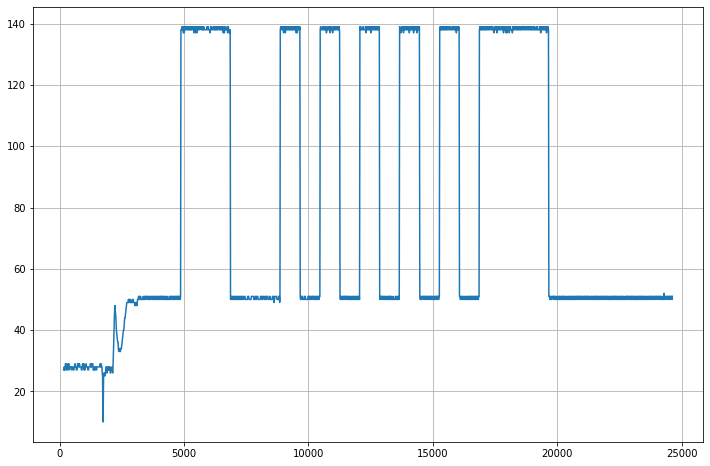

In [151]:
fig = plt.figure(figsize=(12,8))
plt.plot(df.t, df.y)
plt.grid()
plt.show()

### Inspecting the 2 seconds configuration state

In [152]:
# inspecting the configuration state

start = 0 # ms
end   = start+2000 # ms

In [153]:
df[(df.t>start) & (df.t<end)].head()

,t,y
0,156,27.0
1,168,27.0
2,182,28.0
3,194,27.0
4,206,27.0


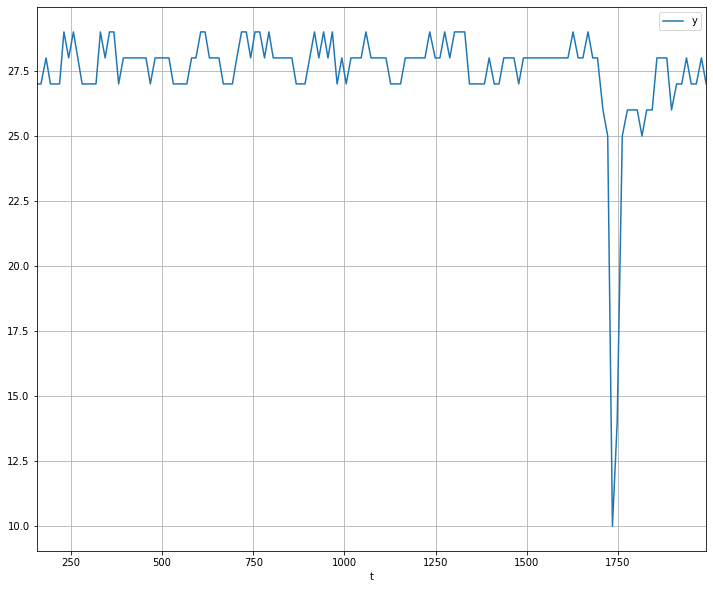

In [154]:
# try to see when we have the state change 0->1
df[(df.t>start) & (df.t<end)].plot('t','y', figsize=(12, 10))
plt.grid()
plt.show()

let's try to get closer... 

In [155]:
# let's see when we have the change 0->1

start = 180        # ms
end   = start+2000 # ms

df[(df.t>start) & (df.t<end)].head(10)

,t,y
2,182,28.0
3,194,27.0
4,206,27.0
5,219,27.0
6,231,29.0
7,244,28.0
8,257,29.0
9,269,28.0
10,281,27.0
11,293,27.0


In [156]:
# ok, around t=194 ms

In [157]:
# let's see now if it lasts exactly 2000 ms
t_0 = 194 
delta = 2000       # one open led for 2 seconds

In [158]:
# check if we see the change 1->0 in the tail
df[(df.t>=t_0) & (df.t<=t_0+delta)].tail()

,t,y
151,2127,26.0
152,2141,28.0
153,2154,31.0
154,2167,35.0
155,2182,40.0


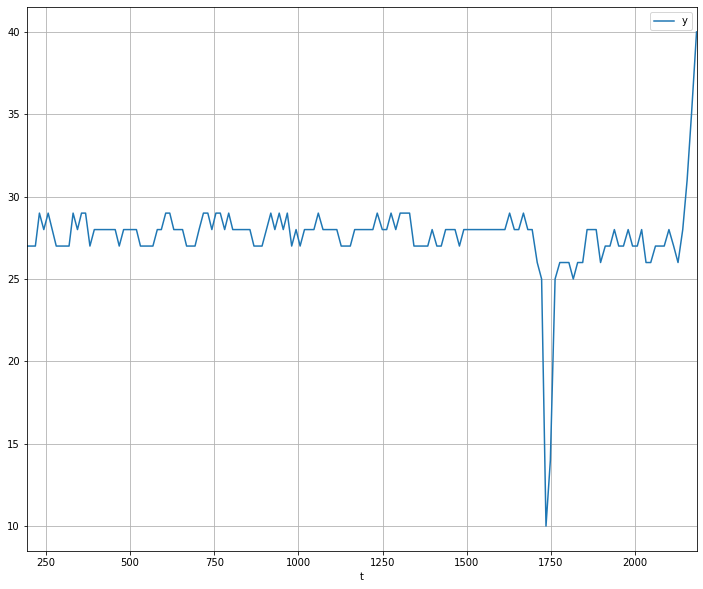

In [159]:
df[(df.t>=t_0) & (df.t<=t_0+delta)].plot('t','y', figsize=(12, 10))
plt.grid()
plt.show()

In [160]:
# we don't se the state change 1->0 after 2000 ms
# so let's try to get a different delta (i.e. 2020ms)
delta=2020

In [161]:
# let's see the tail
df[(df.t>=t_0) & (df.t<=t_0+delta)]

,t,y
3,194,27.0
4,206,27.0
5,219,27.0
6,231,29.0
7,244,28.0
8,257,29.0
9,269,28.0
10,281,27.0
11,293,27.0
12,306,27.0


##### Ok, the change is around 2195 ms

In [162]:
2195 - 194

2001

##### OK! we're almost there in terms of milliseconds, in the sense that the configuration state lasts 2001 ~ 2000 ms

In [163]:
delta = 2001

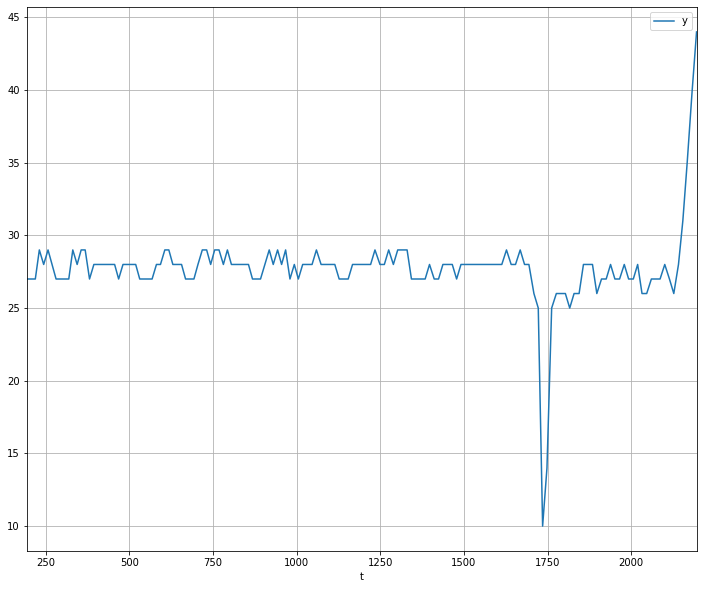

In [164]:
df[(df.t>=t_0) & (df.t<=t_0+delta)].plot('t','y', figsize=(12, 10))
plt.grid()
plt.show()

In [165]:
df

,t,y
0,156,27.0
1,168,27.0
2,182,28.0
3,194,27.0
4,206,27.0
5,219,27.0
6,231,29.0
7,244,28.0
8,257,29.0
9,269,28.0


### Real Time Analysis

In [166]:
import numpy as np

rest_state = True
configuration_state = False
loiter_state = False
receiving_state = False
conclusion_state = False

zero_setting_time = 500
zero_list = df[df["t"] <= zero_setting_time]
nominal_zero = np.mean(zero_list)["y"]
zero_thr = 2*nominal_zero

df_real_time = df[df["t"] > zero_setting_time]
df_real_time.reset_index(inplace = True)
ratio = 0.5
cumulative_mean = nominal_zero
loiter_t = 2000
signal_delta = 200

message = ""


for i in range(0, len(df_real_time)):
    
    y = df_real_time["y"][i]
    t = df_real_time["t"][i]
    
    if rest_state:
        print("rest state", y, t)
        if y > zero_thr:
            thr = zero_thr
            configuration_state = True
            rest_state = False

    if configuration_state:
        print("configuration state", y, t, thr, cumulative_mean)
        if y < thr:
            loiter_state = True
            configuration_state = False
            loiter_start = t
        if configuration_state:
            cumulative_mean = (y + cumulative_mean)/2
            thr = cumulative_mean*ratio
        
    if loiter_state:
        print("loiter state", y, t)
        if t >= loiter_start + loiter_t:
            loiter_state = False
            receiving_state = True
            t_0 = t
            cnt = 1
            n_peaks = 0
            n_gaps = 0
    
    if receiving_state:
        print("receiving state", y, t, t_0)
        if y >= thr:
            n_peaks += 1
        else:
            n_gaps += 1
        if t >= t_0 + cnt*200:
            print(n_peaks, n_gaps, t)
            cnt += 1
            if n_peaks >= n_gaps:
                message = message + "1"
            else:
                message = message + "0"
            n_peaks = 0
            n_gaps = 0
    
    if conclusion_state:
        print("conclusion state", y, t)
        pass

rest state 28.0 505
rest state 28.0 519
rest state 27.0 531
rest state 27.0 543
rest state 27.0 556
rest state 27.0 568
rest state 28.0 581
rest state 28.0 593
rest state 29.0 606
rest state 29.0 618
rest state 28.0 630
rest state 28.0 644
rest state 28.0 656
rest state 27.0 668
rest state 27.0 680
rest state 27.0 693
rest state 28.0 705
rest state 29.0 718
rest state 29.0 731
rest state 28.0 743
rest state 29.0 755
rest state 29.0 768
rest state 28.0 781
rest state 29.0 793
rest state 28.0 805
rest state 28.0 818
rest state 28.0 830
rest state 28.0 843
rest state 28.0 856
rest state 27.0 868
rest state 27.0 880
rest state 27.0 892
rest state 28.0 905
rest state 29.0 918
rest state 28.0 930
rest state 29.0 943
rest state 28.0 955
rest state 29.0 967
rest state 27.0 980
rest state 28.0 993
rest state 27.0 1005
rest state 28.0 1018
rest state 28.0 1032
rest state 28.0 1046
rest state 29.0 1059
rest state 28.0 1073
rest state 28.0 1086
rest state 28.0 1099
rest state 28.0 1114
rest state 

configuration state 139.0 5702 69.23861437042326 138.47722874084653
configuration state 138.0 5716 69.36930718521162 138.73861437042325
configuration state 139.0 5731 69.18465359260581 138.36930718521162
configuration state 138.0 5745 69.3423267963029 138.6846535926058
configuration state 139.0 5760 69.17116339815145 138.3423267963029
configuration state 138.0 5775 69.33558169907573 138.67116339815146
configuration state 139.0 5789 69.16779084953787 138.33558169907573
configuration state 138.0 5804 69.33389542476894 138.66779084953788
configuration state 138.0 5818 69.16694771238447 138.33389542476894
configuration state 138.0 5833 69.08347385619223 138.16694771238446
configuration state 138.0 5848 69.04173692809611 138.08347385619223
configuration state 138.0 5862 69.02086846404805 138.0417369280961
configuration state 138.0 5876 69.01043423202402 138.02086846404805
configuration state 138.0 5891 69.005217116012 138.010434232024
configuration state 138.0 5906 69.002608558006 138.00521

receiving state 51.0 10225 8867
receiving state 51.0 10240 8867
receiving state 50.0 10254 8867
receiving state 50.0 10268 8867
0 13 10268
receiving state 51.0 10283 8867
receiving state 51.0 10298 8867
receiving state 50.0 10312 8867
receiving state 50.0 10327 8867
receiving state 51.0 10341 8867
receiving state 51.0 10355 8867
receiving state 50.0 10371 8867
receiving state 51.0 10385 8867
receiving state 51.0 10399 8867
receiving state 50.0 10414 8867
receiving state 50.0 10429 8867
receiving state 51.0 10443 8867
receiving state 51.0 10458 8867
receiving state 138.0 10472 8867
1 13 10472
receiving state 139.0 10487 8867
receiving state 138.0 10504 8867
receiving state 138.0 10519 8867
receiving state 138.0 10534 8867
receiving state 138.0 10550 8867
receiving state 139.0 10566 8867
receiving state 138.0 10582 8867
receiving state 139.0 10597 8867
receiving state 138.0 10612 8867
receiving state 138.0 10629 8867
receiving state 138.0 10644 8867
receiving state 139.0 10659 8867
recei

receiving state 51.0 14840 8867
receiving state 51.0 14855 8867
receiving state 50.0 14869 8867
0 13 14869
receiving state 51.0 14884 8867
receiving state 51.0 14899 8867
receiving state 50.0 14913 8867
receiving state 51.0 14927 8867
receiving state 50.0 14942 8867
receiving state 51.0 14957 8867
receiving state 51.0 14971 8867
receiving state 50.0 14986 8867
receiving state 50.0 15000 8867
receiving state 51.0 15014 8867
receiving state 51.0 15030 8867
receiving state 50.0 15044 8867
receiving state 50.0 15058 8867
receiving state 51.0 15073 8867
0 14 15073
receiving state 51.0 15088 8867
receiving state 51.0 15102 8867
receiving state 50.0 15117 8867
receiving state 51.0 15131 8867
receiving state 51.0 15145 8867
receiving state 51.0 15161 8867
receiving state 50.0 15175 8867
receiving state 51.0 15190 8867
receiving state 51.0 15204 8867
receiving state 51.0 15219 8867
receiving state 50.0 15234 8867
receiving state 51.0 15248 8867
receiving state 51.0 15262 8867
receiving state 13

receiving state 138.0 19510 8867
receiving state 139.0 19525 8867
receiving state 138.0 19540 8867
receiving state 139.0 19557 8867
receiving state 137.0 19572 8867
receiving state 139.0 19588 8867
receiving state 138.0 19603 8867
receiving state 138.0 19619 8867
receiving state 139.0 19635 8867
receiving state 138.0 19650 8867
receiving state 51.0 19665 8867
receiving state 51.0 19681 8867
11 2 19681
receiving state 51.0 19695 8867
receiving state 50.0 19709 8867
receiving state 50.0 19724 8867
receiving state 51.0 19738 8867
receiving state 51.0 19753 8867
receiving state 50.0 19768 8867
receiving state 50.0 19782 8867
receiving state 51.0 19796 8867
receiving state 51.0 19812 8867
receiving state 51.0 19826 8867
receiving state 51.0 19841 8867
receiving state 50.0 19855 8867
receiving state 51.0 19869 8867
0 13 19869
receiving state 51.0 19885 8867
receiving state 50.0 19899 8867
receiving state 51.0 19913 8867
receiving state 51.0 19928 8867
receiving state 50.0 19943 8867
receivin

receiving state 50.0 24121 8867
receiving state 51.0 24136 8867
receiving state 51.0 24151 8867
receiving state 51.0 24165 8867
receiving state 50.0 24179 8867
receiving state 50.0 24194 8867
receiving state 51.0 24209 8867
receiving state 50.0 24223 8867
receiving state 50.0 24238 8867
receiving state 50.0 24252 8867
receiving state 51.0 24266 8867
receiving state 51.0 24282 8867
0 14 24282
receiving state 52.0 24296 8867
receiving state 50.0 24310 8867
receiving state 51.0 24325 8867
receiving state 51.0 24340 8867
receiving state 51.0 24354 8867
receiving state 50.0 24369 8867
receiving state 51.0 24383 8867
receiving state 51.0 24397 8867
receiving state 51.0 24413 8867
receiving state 51.0 24427 8867
receiving state 50.0 24441 8867
receiving state 51.0 24456 8867
receiving state 51.0 24471 8867
0 13 24471
receiving state 50.0 24485 8867
receiving state 51.0 24500 8867
receiving state 51.0 24514 8867
receiving state 50.0 24528 8867
receiving state 51.0 24544 8867
receiving state 51

In [167]:
print(message)
print("11110000111100001111000011110000111100001111")

111100001111000011110000111100001111000011111111111111000000000000000000000000
11110000111100001111000011110000111100001111
